In [2]:
%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt
import ternary
from matplotlib import gridspec
import numpy as np
import matplotlib as mpl
# magnetization=np.load('magnetization2.npy') #total magnetization
magnetization = np.load('mag_per_mag_atom.npy')
maximum_mag = np.load("maximum_mag.npy", allow_pickle=True)
test_labels = np.load("test_labels.npy", allow_pickle=True)
# eps = 1e-6
# magnetization = np.log(magnetization + eps)
vector=np.load('vector2.npy')  #output vector in ternary form
# atomnumber=np.load('atomnumber.npy') #atom number
# magnetization=magnetization/atomnumber  #magnetization per atom

Text(0.5, 0, 'Average total magnetization per magnetic atom')

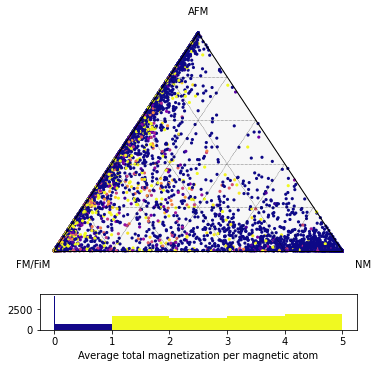

In [15]:
fig=plt.figure(constrained_layout=True,figsize=(10,5))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

cmap = 'plasma'
vmax=1
vmin=0

sc=tax.scatter(vector, s=10, edgecolors='none',c=magnetization, cmap=cmap, 
               vmin=vmin,vmax=vmax)
# tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cm = plt.cm.get_cmap('plasma')

bins = [0, 0.01, 1, 2, 3, 4, 5]

n, _, patches = plt.hist(maximum_mag, bins=bins)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(norm(c) ));

plt.xlabel('Average total magnetization per magnetic atom')
    


In [123]:
cm(256)

(0.940015, 0.975158, 0.131326, 1.0)

In [261]:
thresh = 0.001
less_mag = (maximum_mag <= thresh).nonzero()[0]
more_mag = (maximum_mag > thresh).nonzero()[0]

In [262]:
maximum_mag.shape

(11393,)

No handles with labels found to put in legend.


Text(0.5, 0, 'Maximum magnetic moment')

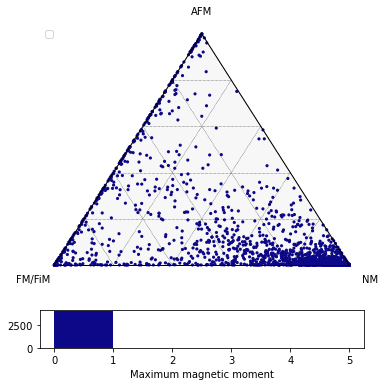

In [263]:
fig=plt.figure(constrained_layout=True,figsize=(10,5))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

cmap = 'plasma'
vmax=4
vmin=0

sc=tax.scatter(vector[less_mag], s=10, edgecolors='none',c=maximum_mag[less_mag], cmap=cmap, 
               vmin=vmin,vmax=vmax)
tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cm = plt.cm.get_cmap('plasma')

bins = [0, 1, 2, 3, 4, 5]

n, _, patches = plt.hist(maximum_mag[less_mag], bins=bins)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(norm(c) ));

plt.xlabel('Maximum magnetic moment')

Text(0.5, 0, 'Maximum atomic magnetic moment')

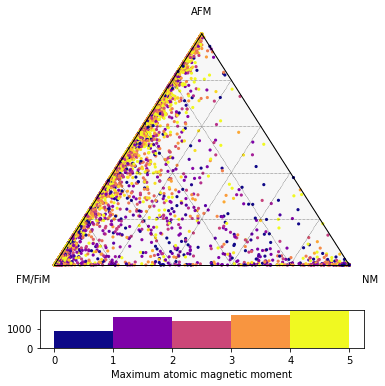

In [264]:
fig=plt.figure(constrained_layout=True,figsize=(10,5))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
#figure.set_size_inches(10, 10)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

cmap = 'plasma'
vmax=4
vmin=0

sc=tax.scatter(vector[more_mag], s=10, edgecolors='none',c=maximum_mag[more_mag], cmap=cmap, 
               vmin=vmin,vmax=vmax)
# tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cm = plt.cm.get_cmap('plasma')

bins = [0, 1, 2, 3, 4, 5]

n, _, patches = plt.hist(maximum_mag[more_mag], bins=bins)
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(norm(c) ));

plt.xlabel('Maximum atomic magnetic moment')

In [265]:
print(less_mag.shape), print(more_mag.shape)

(3932,)
(7461,)


(None, None)

In [266]:
d = {'FM': 0, 'FiM': 0, 'NM': 0, 'AFM': 0}
for i in test_labels[less_mag]:
    d[i] += 1
    
print(d)

d = {'FM': 0, 'FiM': 0, 'NM': 0, 'AFM': 0}
for i in test_labels[more_mag]:
    d[i] += 1
    
print(d)

{'FM': 161, 'FiM': 3, 'NM': 3733, 'AFM': 35}
{'FM': 1968, 'FiM': 2002, 'NM': 0, 'AFM': 3491}


In [267]:
pred_label = []
order_label = ['NM', 'AFM', 'FM/FiM']
for v in vector:
    pred_label.append(order_label[np.argmax(v)])
pred_label = np.array(pred_label)
    
d = {'FM/FiM': 0, 'NM': 0, 'AFM': 0}
for i in pred_label[less_mag]:
    d[i] += 1
    
print(d)

d = {'FM/FiM': 0, 'NM': 0, 'AFM': 0}
for i in pred_label[more_mag]:
    d[i] += 1
    
print(d)

{'FM/FiM': 391, 'NM': 3373, 'AFM': 168}
{'FM/FiM': 3744, 'NM': 483, 'AFM': 3234}


In [182]:
vector[more_mag].mean(axis=0)

array([0.06536875, 0.43405199, 0.50057926])

In [183]:
vector[less_mag].mean(axis=0)

array([0.76521699, 0.07935866, 0.15542436])

In [184]:
(vector[less_mag][:, 0] < 0.1).nonzero()[0].shape

(589,)

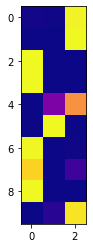

In [188]:
plt.imshow(vector[(vector[less_mag][:, 0] < 0.1).nonzero()[0]][:10], cmap="plasma", vmin=0, vmax=1)

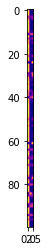

In [202]:
plt.imshow(vector[less_mag][:100], cmap="plasma", vmin=0, vmax=1)

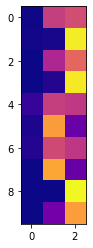

In [208]:
plt.imshow(vector[less_mag][(vector[less_mag][:, 0] < 0.1).nonzero()[0]][:10], cmap="plasma", vmin=0, vmax=1)

In [209]:
test_labels[less_mag][(vector[less_mag][:, 0] < 0.1).nonzero()[0]][:10]

array(['FM', 'FM', 'FiM', 'FM', 'NM', 'FM', 'FM', 'FM', 'AFM', 'NM'],
      dtype='<U3')

In [217]:
d = {'FM': 0, 'FiM': 0, 'NM': 0, 'AFM': 0}
for i in test_labels[less_mag][(vector[less_mag][:, 0] < 0.1).nonzero()[0]]:
    d[i] += 1
    
print(d)

{'FM': 168, 'FiM': 61, 'NM': 333, 'AFM': 27}


In [223]:
d = {'FM': 0, 'FiM': 0, 'NM': 0, 'AFM': 0}
for i in test_labels[less_mag][(vector[less_mag][:, 0] > 0.9).nonzero()[0]]:
    d[i] += 1
    
print(d)

{'FM': 131, 'FiM': 6, 'NM': 2495, 'AFM': 13}


In [230]:
test_labels

array(['FM', 'NM', 'NM', ..., 'NM', 'NM', 'AFM'], dtype='<U3')

In [236]:
max(maximum_mag)

9.148

(array([4.616e+03, 1.401e+03, 1.119e+03, 1.158e+03, 2.248e+03, 8.300e+02,
        0.000e+00, 2.000e+01, 0.000e+00, 1.000e+00]),
 array([0.    , 0.9148, 1.8296, 2.7444, 3.6592, 4.574 , 5.4888, 6.4036,
        7.3184, 8.2332, 9.148 ]),
 <BarContainer object of 10 artists>)

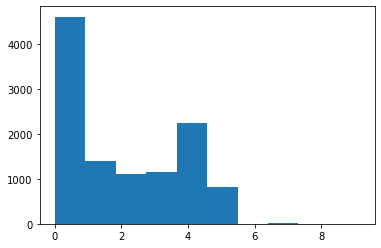

In [238]:
plt.hist(maximum_mag)